In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg

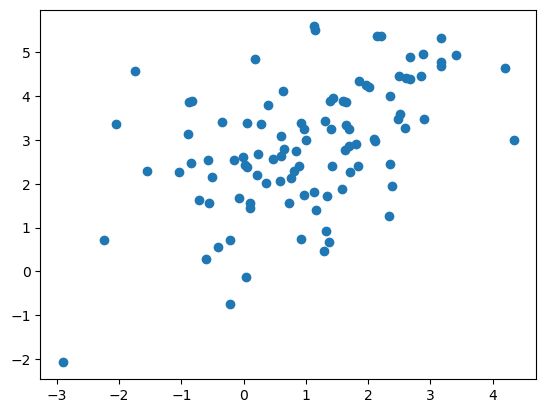

In [21]:
X = np.random.multivariate_normal([1, 3], [[2, 1], [1, 2]], 100)
# plt.scatter(X[:,0],X[:,1])
plt.scatter(*X.T) # 等价于上一行

In [50]:
U,s,Vh = linalg.svd(X, full_matrices=False)
U.shape, s.shape, Vh.shape
# pow(linalg.eigvals(X.T @ X),1/2), s
# np.allclose(X, U @ np.diag(s) @ Vh) # 查看两个元素在误差内是否相等
np.allclose(pow(linalg.eigvals(X.T @ X),1/2)[::-1],s) # [::-1]中，'::'代表顺序相反操作，'-1'代表最后一位

True

In [57]:
n, p = 100, 15
X = np.random.normal(size=(n,p))
X0 = X - X.mean(axis=0) # 'axis=0' 只计算列的
np.allclose(0,X0.mean(axis=0))

V = 1/n * X0.T @ X0
V.shape

(15, 15)

In [58]:
vp, U =linalg.eigh(V)
C = X0 @ U # 计算主成成分
C.shape

(100, 15)

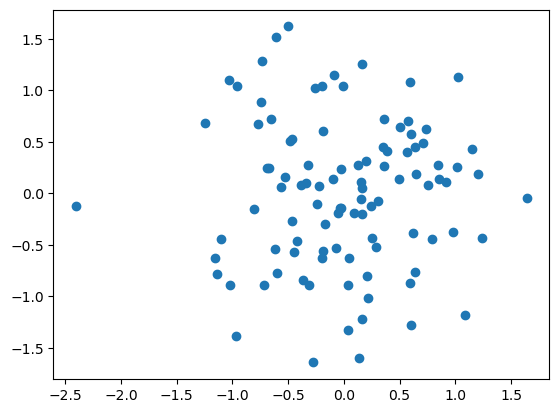

In [61]:
plt.scatter(C[:,0],C[:,1])

In [75]:
V = 1/(n-1) * X0.T @ X0 # 更好采用样本方差
vp, U = linalg.eigh(V)
C = X0 @ U
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
np.allclose(pca.explained_variance_, vp[::-1])

pca = PCA(n_components=3)
pca.fit(X)
pca.components_[0,:]
# U[:,0]
pca.fit_transform(X)

array([[-0.13605587,  2.22536344,  0.23901743],
       [-0.18815496, -1.39759856, -0.36667603],
       [-1.73921493,  0.42296601, -1.82556044],
       [ 4.34850063,  1.40842225, -1.00758911],
       [-0.89219493,  0.41638545,  0.11207678],
       [-0.38072237,  0.51880977,  0.302347  ],
       [ 0.17662443, -0.70397021,  0.83836684],
       [ 0.59338134,  0.8748699 , -1.37598933],
       [-0.88702367, -0.3102665 , -0.44688305],
       [-1.39129182, -1.62528938,  0.29534862],
       [-2.21010715, -0.80502672,  1.3210153 ],
       [ 0.70131859, -0.82752943,  0.64526749],
       [-1.1752454 , -1.21409058,  1.74673974],
       [-2.03127119, -0.655859  , -1.92134582],
       [ 1.44276578,  0.49886696,  0.96706836],
       [-0.2954446 ,  0.12368916, -0.40203974],
       [-1.06720707,  0.11425773, -0.90452725],
       [ 1.62781413, -0.36208999,  0.97130252],
       [ 2.45422191, -1.97412133, -0.2171198 ],
       [ 0.75279819,  1.64663148,  0.97277983],
       [-1.851833  ,  0.70793603,  1.307

In [77]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
X = housing.frame
X = X.loc[:, ~X.isna().any() & (X.dtypes.astype(str).isin(["float64", "int64"]))]
y = housing.target

/Users/menamot/opt/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<BarContainer object of 35 artists>

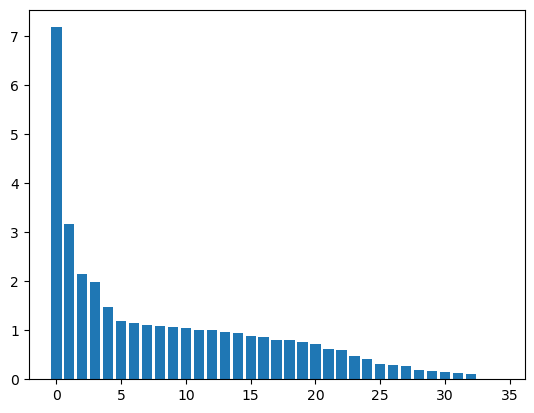

In [100]:
from sklearn.preprocessing import StandardScaler
pca=PCA()
X0 = StandardScaler().fit_transform(X)
pca.fit_transform(X0)
plt.bar(range(len(pca.explained_variance_)), pca.explained_variance_)

<BarContainer object of 35 artists>

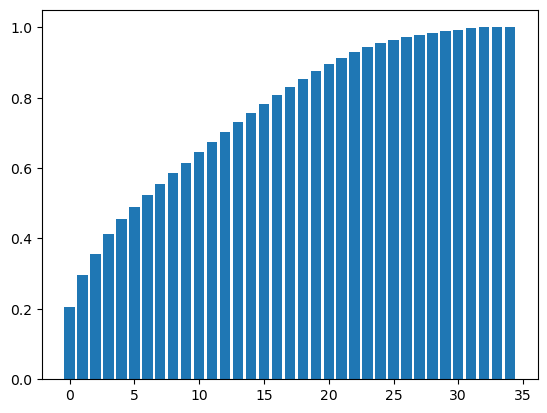

In [102]:
blah = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(len(pca.explained_variance_)), blah)

array([7.17450035e+00, 3.16687218e+00, 2.15034702e+00, 1.97942053e+00,
       1.47993455e+00, 1.18893135e+00, 1.15433405e+00, 1.11155438e+00,
       1.07749101e+00, 1.06702667e+00, 1.04242670e+00, 1.00143530e+00,
       9.95133778e-01, 9.70214762e-01, 9.41366409e-01, 8.85922414e-01,
       8.62523480e-01, 8.08883272e-01, 8.01609404e-01, 7.69205629e-01,
       7.11488342e-01, 6.19976833e-01, 5.87761424e-01, 4.72126180e-01,
       4.09653949e-01, 3.15066463e-01, 2.90489925e-01, 2.62141786e-01,
       1.94835823e-01, 1.60129344e-01, 1.43472298e-01, 1.29339766e-01,
       9.83736570e-02, 1.41492071e-30, 2.14800190e-32])